In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inequality-in-education-around-the-world/Inequality in Education.csv


In [2]:
# Load the CSV file
dataset_file = ('/kaggle/input/inequality-in-education-around-the-world/Inequality in Education.csv')
df = pd.read_csv(dataset_file)

# Display the first few rows of the dataset
df.head()


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


**The dataset contains the following columns:**

* **ISO3:** ISO3 code for the Country/Territory
* **Country:** Name of the Country/Territory
* **Human Development Groups:** Human Development Groups
* **UNDP Developing Regions:** UNDP Developing Regions
* **HDI Rank (2021):** Human Development Index Rank for 2021
* **Inequality in Education (2010-2021):** Inequality in Education for the years 2010 to 2021

In [3]:
# Basic statistics of the dataset

# Number of missing values in each column
missing_values = df.isna().sum()

# Distribution of countries across different Human Development Groups
hdg_distribution = df['Human Development Groups'].value_counts()

# Distribution of countries across different UNDP Developing Regions
undp_regions_distribution = df['UNDP Developing Regions'].value_counts()

missing_values, hdg_distribution, undp_regions_distribution


(ISO3                               0
 Country                            0
 Human Development Groups           4
 UNDP Developing Regions           44
 HDI Rank (2021)                    4
 Inequality in Education (2010)    58
 Inequality in Education (2011)    45
 Inequality in Education (2012)    38
 Inequality in Education (2013)    30
 Inequality in Education (2014)    27
 Inequality in Education (2015)    27
 Inequality in Education (2016)    27
 Inequality in Education (2017)    27
 Inequality in Education (2018)    23
 Inequality in Education (2019)    21
 Inequality in Education (2020)    19
 Inequality in Education (2021)    19
 dtype: int64,
 Very High    66
 High         49
 Medium       44
 Low          32
 Name: Human Development Groups, dtype: int64,
 SSA    46
 LAC    33
 EAP    26
 AS     20
 ECA    17
 SA      9
 Name: UNDP Developing Regions, dtype: int64)

**The dataset has missing values in several columns:**

* Human Development Groups: 4 missing values
* UNDP Developing Regions: 44 missing values
* HDI Rank (2021): 4 missing values
* Inequality in Education (2010-2021): The number of missing values ranges from 19 to 58 for different years.

**The distribution of countries across different Human Development Groups is as follows:**

* Very High: 66 countries
* High: 49 countries
* Medium: 44 countries
* Low: 32 countries

**The distribution of countries across different UNDP Developing Regions is as follows:**

* Sub-Saharan Africa (SSA): 46 countries
* Latin America and the Caribbean (LAC): 33 countries
* East Asia and the Pacific (EAP): 26 countries
* Arab States (AS): 20 countries
* Europe and Central Asia (ECA): 17 countries
* South Asia (SA): 9 countries

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


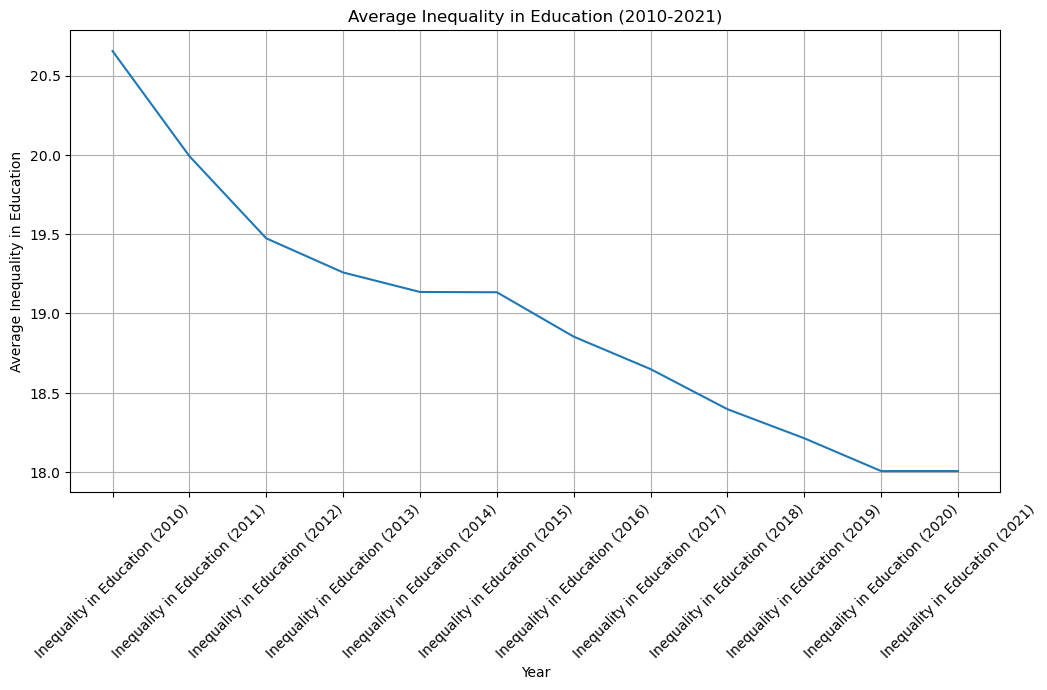

Inequality in Education (2010)    20.654419
Inequality in Education (2011)    19.991823
Inequality in Education (2012)    19.473658
Inequality in Education (2013)    19.258472
Inequality in Education (2014)    19.135457
Inequality in Education (2015)    19.133751
Inequality in Education (2016)    18.853851
Inequality in Education (2017)    18.649140
Inequality in Education (2018)    18.396401
Inequality in Education (2019)    18.212993
Inequality in Education (2020)    18.006314
Inequality in Education (2021)    18.006314
dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average Inequality in Education for each year from 2010 to 2021
average_inequality_per_year = df.loc[:, 'Inequality in Education (2010)': 'Inequality in Education (2021)'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_inequality_per_year.index, y=average_inequality_per_year.values)
plt.xticks(rotation=45)
plt.title('Average Inequality in Education (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Education')
plt.grid(True)
plt.show()

average_inequality_per_year


> The line plot shows the average inequality in education for each year from 2010 to 2021. It indicates a gradual decrease in the average inequality in education over this period.

**Here are the average inequalities in education for each year:**

* 2010: 20.65
* 2011: 19.99
* 2012: 19.47
* 2013: 19.26
* 2014: 19.14
* 2015: 19.13
* 2016: 18.85
* 2017: 18.65
* 2018: 18.40
* 2019: 18.21
* 2020: 18.01
* 2021: 18.01

> This suggests that, on average, educational inequality has been decreasing globally over the past decade, although it still remains a significant issue.

/tmp/ipykernel_20/988159027.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(['Human Development Groups', 'UNDP Developing Regions']).mean()


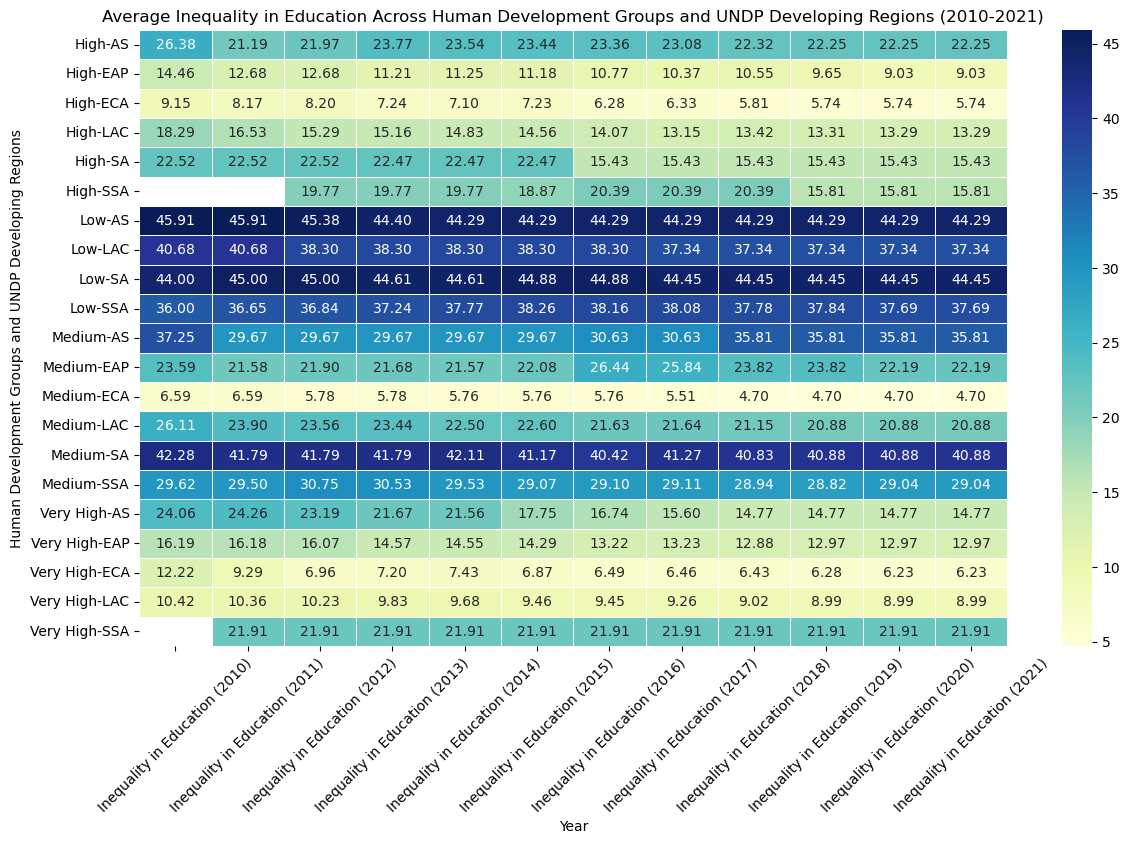

In [5]:
# Average Inequality in Education across different Human Development Groups and UNDP Developing Regions

# Group by Human Development Groups and UNDP Developing Regions and compute the mean
grouped_df = df.groupby(['Human Development Groups', 'UNDP Developing Regions']).mean()

# Select only the Inequality in Education columns
grouped_inequality_df = grouped_df.loc[:, 'Inequality in Education (2010)': 'Inequality in Education (2021)']

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_inequality_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Average Inequality in Education Across Human Development Groups and UNDP Developing Regions (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Human Development Groups and UNDP Developing Regions')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


> The heatmap shows the average inequality in education across different human development groups and UNDP developing regions from 2010 to 2021.

**From the heatmap, we can observe the following trends:**

**Sub-Saharan Africa (SSA)** has the highest average inequality in education across all human development groups and UNDP developing regions for all the years. This is especially pronounced for countries in the 'Low' human development group.

**South Asia (SA)** and **Arab States (AS)** also have relatively high average inequalities in education.

**Europe and Central Asia (ECA)** and **Latin America and the Caribbean (LAC)** have relatively lower average inequalities in education compared to other regions.

Overall, the average inequality in education is highest for countries in the 'Low' human development group and decreases as the human development group increases to 'Medium', 'High', and 'Very High'.

> This analysis provides a comprehensive overview of the global trends in educational inequality across different regions and development groups. It is clear that educational inequality remains a significant issue, particularly in Sub-Saharan Africa, South Asia, and the Arab States, and among countries with lower human development.

In [6]:
# Countries with the highest and lowest Inequality in Education in 2021

# Drop rows with missing values in 'Inequality in Education (2021)'
df_clean = df.dropna(subset=['Inequality in Education (2021)'])

# Top 10 countries with the highest Inequality in Education in 2021
highest_inequality_2021 = df_clean.nlargest(10, 'Inequality in Education (2021)')

# Top 10 countries with the lowest Inequality in Education in 2021
lowest_inequality_2021 = df_clean.nsmallest(10, 'Inequality in Education (2021)')

highest_inequality_2021[['Country', 'Inequality in Education (2021)']], lowest_inequality_2021[['Country', 'Inequality in Education (2021)']]


(          Country  Inequality in Education (2021)
 64         Guinea                       50.124110
 26         Bhutan                       48.226575
 38        Comoros                       47.614380
 155  Sierra Leone                       47.502890
 152       Senegal                       47.135300
 65         Gambia                       47.000050
 191         Yemen                       46.137650
 33    Ivory Coast                       45.609040
 0     Afghanistan                       45.365170
 174   Timor-Leste                       44.911790,
                 Country  Inequality in Education (2021)
 185          Uzbekistan                        0.550110
 43              Czechia                        1.255630
 163            Slovakia                        1.747920
 133         New Zealand                        1.840132
 30          Switzerland                        2.014570
 54              Estonia                        2.027370
 148  Russian Federation               

**The top 10 countries with the highest inequality in education in 2021 are:**

* Guinea: 50.12
* Bhutan: 48.23
* Comoros: 47.61
* Sierra Leone: 47.50
* Senegal: 47.14
* Gambia: 47.00
* Yemen: 46.14
* Ivory Coast: 45.61
* Afghanistan: 45.37
* Timor-Leste: 44.91

**The top 10 countries with the lowest inequality in education in 2021 are:**

* Uzbekistan: 0.55
* Czechia: 1.26
* Slovakia: 1.75
* New Zealand: 1.84
* Switzerland: 2.01
* Estonia: 2.03
* Russian Federation: 2.04
* Slovenia: 2.06
* Palau: 2.18
* Iceland: 2.20

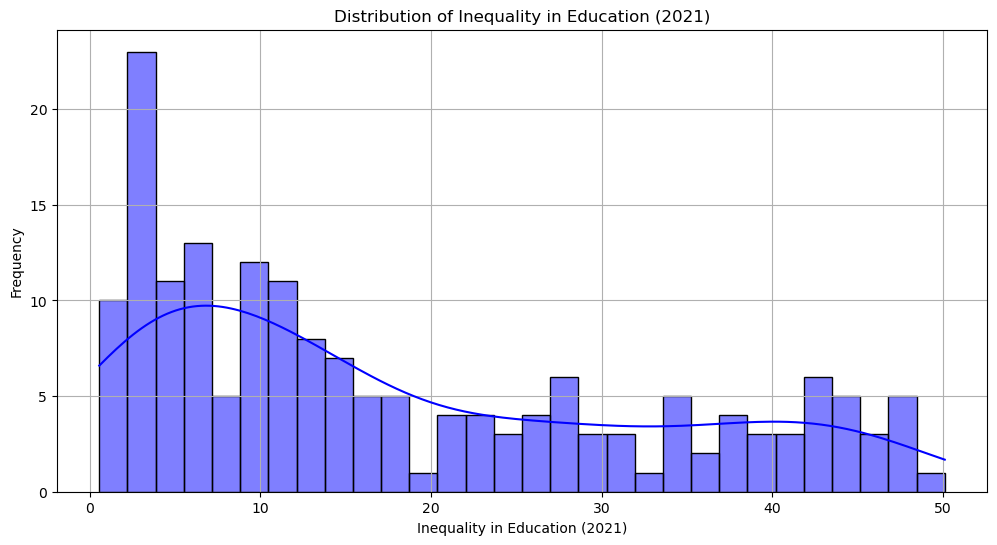

In [7]:
# Distribution of Inequality in Education in 2021

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Inequality in Education (2021)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Inequality in Education (2021)')
plt.xlabel('Inequality in Education (2021)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> The histogram shows the distribution of inequality in education in 2021 across all countries. The distribution is right-skewed, indicating that most countries have relatively low educational inequality, but there are a few countries with very high educational inequality.

> This analysis and visualization provide insights into the countries with the highest and lowest educational inequality and the overall distribution of educational inequality in 2021.

In [8]:
# Change in Inequality in Education for each country from 2010 to 2021

# Calculate the change in Inequality in Education from 2010 to 2021
df_clean['Change in Inequality (2010-2021)'] = df_clean['Inequality in Education (2021)'] - df_clean['Inequality in Education (2010)']

# Top 10 countries with the largest increase in Inequality in Education from 2010 to 2021
largest_increase_inequality = df_clean.nlargest(10, 'Change in Inequality (2010-2021)')

# Top 10 countries with the largest decrease in Inequality in Education from 2010 to 2021
largest_decrease_inequality = df_clean.nsmallest(10, 'Change in Inequality (2010-2021)')

largest_increase_inequality[['Country', 'Change in Inequality (2010-2021)']], largest_decrease_inequality[['Country', 'Change in Inequality (2010-2021)']]


/tmp/ipykernel_20/1810514875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Change in Inequality (2010-2021)'] = df_clean['Inequality in Education (2021)'] - df_clean['Inequality in Education (2010)']


(           Country  Change in Inequality (2010-2021)
 14    Burkina Faso                         18.186385
 120     Mozambique                          9.611084
 64          Guinea                          8.124110
 117        Myanmar                          7.412720
 26          Bhutan                          3.415905
 152        Senegal                          2.556300
 0      Afghanistan                          2.556170
 33     Ivory Coast                          2.409040
 121     Mauritania                          1.926890
 66   Guinea-Bissau                          1.772040,
              Country  Change in Inequality (2010-2021)
 134             Oman                        -18.594060
 92          Kiribati                        -11.743470
 111         Maldives                        -10.646090
 17           Bahrain                         -9.586598
 57              Fiji                         -9.217729
 114  North Macedonia                         -9.097830
 187        V

**The top 10 countries with the largest increase in educational inequality from 2010 to 2021 are:**

* Burkina Faso: +18.19
* Mozambique: +9.61
* Guinea: +8.12
* Myanmar: +7.41
* Bhutan: +3.42
* Senegal: +2.56
* Afghanistan: +2.56
* Ivory Coast: +2.41
* Mauritania: +1.93
* Guinea-Bissau: +1.77

**The top 10 countries with the largest decrease in educational inequality from 2010 to 2021 are:**

* Oman: -18.59
* Kiribati: -11.74
* Maldives: -10.65
* Bahrain: -9.59
* Fiji: -9.22
* North Macedonia: -9.10
* Venezuela: -8.86
* Botswana: -8.81
* Qatar: -7.83
* Bolivia: -7.13

> These results indicate that while some countries have made significant progress in reducing educational inequality, others have experienced an increase in inequality over the past decade.

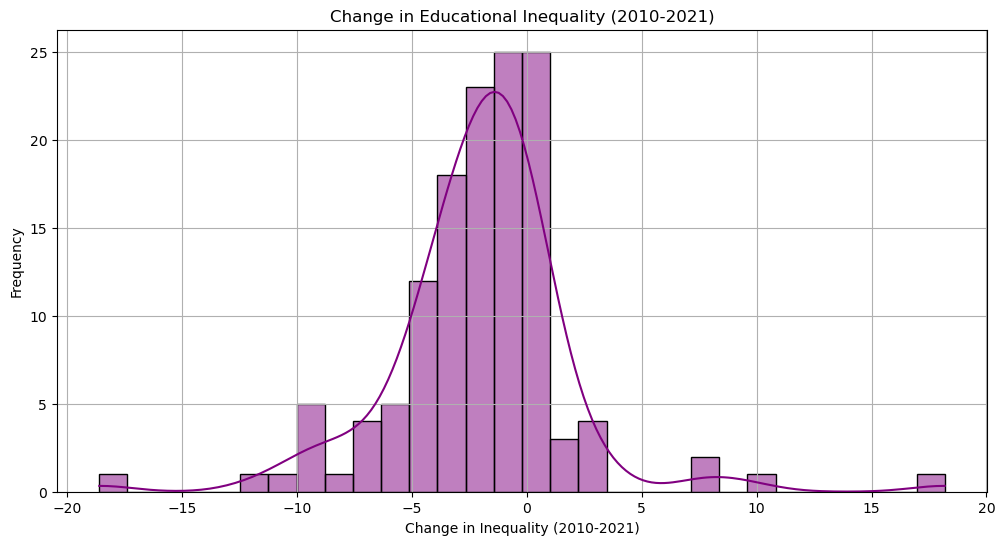

In [9]:
# Visualization of the change in educational inequality from 2010 to 2021 for all countries

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Change in Inequality (2010-2021)'], kde=True, bins=30, color='purple')
plt.title('Change in Educational Inequality (2010-2021)')
plt.xlabel('Change in Inequality (2010-2021)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> The histogram shows the distribution of the change in educational inequality from 2010 to 2021 across all countries. The distribution is approximately symmetrical around zero, indicating that a similar number of countries experienced an increase and a decrease in educational inequality over this period.

> This visualization provides insights into the overall change in educational inequality over the past decade. It is clear that while many countries have made progress in reducing educational inequality, there are still a significant number of countries where educational inequality has increased.

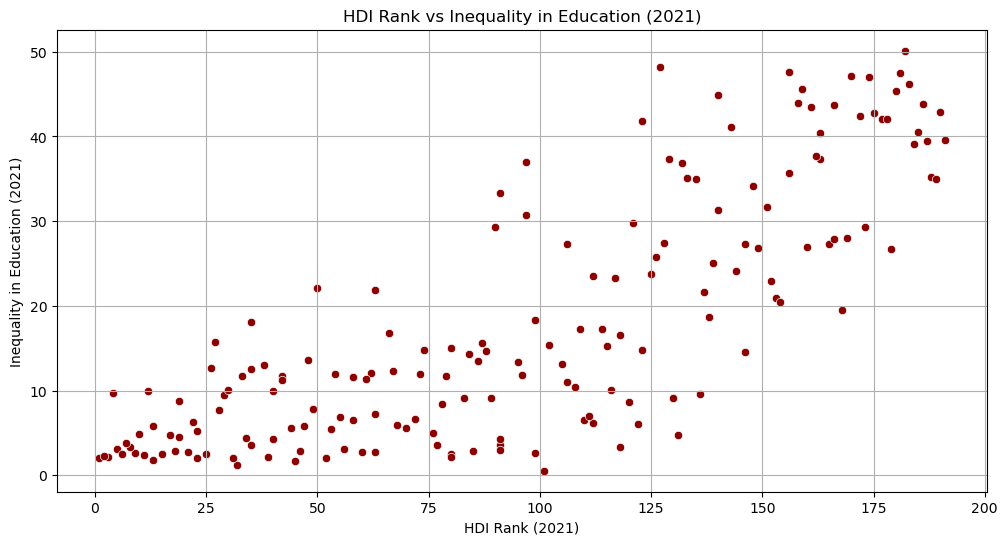

In [10]:
# Scatter plot of HDI Rank against Inequality in Education in 2021

# Drop rows with missing values in 'HDI Rank (2021)' and 'Inequality in Education (2021)'
df_clean_hdi = df.dropna(subset=['HDI Rank (2021)', 'Inequality in Education (2021)'])

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HDI Rank (2021)', y='Inequality in Education (2021)', data=df_clean_hdi, color='darkred')
plt.title('HDI Rank vs Inequality in Education (2021)')
plt.xlabel('HDI Rank (2021)')
plt.ylabel('Inequality in Education (2021)')
plt.grid(True)
plt.show()


> The scatter plot shows the relationship between the Human Development Index (HDI) rank and inequality in education in 2021 for all countries.

> From the plot, we can observe a clear trend: as the HDI rank increases (i.e., human development decreases), the inequality in education tends to increase. This indicates a strong negative correlation between human development and educational inequality.

> This analysis provides insights into the relationship between human development and educational inequality. It is clear that countries with lower human development tend to have higher educational inequality.

In [11]:
import plotly.express as px

# Create a melted version of the dataframe for interactive visualization
df_melted = df.melt(id_vars=['Country', 'Human Development Groups', 'UNDP Developing Regions', 'HDI Rank (2021)'],
                     value_vars=['Inequality in Education (2010)', 'Inequality in Education (2011)',
                                 'Inequality in Education (2012)', 'Inequality in Education (2013)',
                                 'Inequality in Education (2014)', 'Inequality in Education (2015)',
                                 'Inequality in Education (2016)', 'Inequality in Education (2017)',
                                 'Inequality in Education (2018)', 'Inequality in Education (2019)',
                                 'Inequality in Education (2020)', 'Inequality in Education (2021)'],
                     var_name='Year', value_name='Inequality in Education')

# Replace the 'Inequality in Education (Year)' with 'Year' in the 'Year' column
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)')

# Create the interactive plot
fig = px.scatter(df_melted, x='HDI Rank (2021)', y='Inequality in Education',
                 color='Human Development Groups',
                 animation_frame='Year',
                 hover_name='Country',
                 range_y=[0, df_melted['Inequality in Education'].max() + 5],
                 title='Inequality in Education vs HDI Rank (2010-2021)',
                 labels={'HDI Rank (2021)': 'HDI Rank (2021)', 'Inequality in Education': 'Inequality in Education'})

fig.update_layout(autosize=False, width=800, height=600)
fig.show()
